-------

 #  <span style="color:darkblue"> Прогноз стоимости подержанного автомобиля </span>
  ### <span style="color:darkblue"> Разработка ML сервиса: от идеи к прототипу </span>
 by PT

--------

![title](https://new-retail.ru/upload/iblock/388/388b7ba53f4e8e8bfab2f473ee8f7576.jpg)


<div style="text-align: right"> Copyright. new-retail.ru </div>

----------------

## <span style="color:darkblue">1. Общая информация </span>



 *Признаки*
* name / модель автомобиля
* year / год выпуска с завода-изготовителя
* km_driven / пробег на дату продажи
* fuel / тип топлива
* seller_type / продавец
* transmission / тип трансмиссии
* owner / какой по счёту хозяин
* mileage / пробег
* engine / рабочий объем двигателя
* max_power / пиковая мощность двигателя
* torque / крутящий момент
* seats / количество мест

In [588]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [589]:
df = pd.read_csv('cars.csv')

<span style="color:darkblue">Первые 10 авто  из датасета: </span>

In [590]:
df.head(11)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [591]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3978,Hyundai i10 Magna,2015,280000,55000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0
5588,Mahindra Scorpio LX,2012,450000,120000,Diesel,Individual,Manual,Second Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,9.0
1669,Nissan Sunny XL,2012,320000,70000,Petrol,Individual,Manual,Second Owner,16.95 kmpl,1498 CC,97.7 bhp,134Nm@ 4000rpm,5.0
5233,Renault Duster 85PS Diesel RxE,2014,500000,120000,Diesel,Individual,Manual,First Owner,20.45 kmpl,1461 CC,83.8 bhp,200Nm@ 1900rpm,5.0
5599,Volkswagen Polo Diesel Highline 1.2L,2013,250000,120000,Diesel,Individual,Manual,Third Owner,22.07 kmpl,1199 CC,73.9 bhp,180Nm@ 2000rpm,5.0


In [592]:
df.shape

(6999, 13)

**<span style="color:darkblue">База из 6 999 автомобилей! </span>**

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [594]:
df.describe() #for int,float only

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


min year  - 1983, max - 2020.
min seats - 2, max seats -  14.

In [595]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Имеем датасет с пропусками по некоторым признакам. Так как пропущенных значнеий не много - *202 шт. =  2.9%*; почистим датасет от нулевых значений, так как сильного влияния на результат анализа такое изменение не окажет.  

In [596]:
df.dropna(inplace=True)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6796 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6796 non-null   object 
 1   year           6796 non-null   int64  
 2   selling_price  6796 non-null   int64  
 3   km_driven      6796 non-null   int64  
 4   fuel           6796 non-null   object 
 5   seller_type    6796 non-null   object 
 6   transmission   6796 non-null   object 
 7   owner          6796 non-null   object 
 8   mileage        6796 non-null   object 
 9   engine         6796 non-null   object 
 10  max_power      6796 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6796 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 743.3+ KB


In [598]:
df.describe()

,year,selling_price,km_driven,seats
count,6796.000000,6.796000e+03,6.796000e+03,6796.000000
mean,2014.009859,6.517417e+05,6.896421e+04,5.418629
std,3.858962,8.167471e+05,5.806295e+04,0.965330
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.333075e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.907500e+05,9.500000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Исчезли выбросы в значениях переменных 'year'( < 1994 - меньше 25%). 
В selling_price и km_driven изменения незначительные. Для seats изменений нет.

In [599]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6796,6796,6796,6796,6796,6796,6796,6796,6796
unique,1852,4,3,2,5,386,120,314,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3696,5640,5900,4518,197,885,330,468


Среди признаков типа object, после очистки нулевых значений, резких изменений по характеристикам нет.

----------

## <span style="color:darkblue">2. Однофакторный анализ </span>

<span style="color:darkblue">Основные параметры влияющие на цену продажи  подержанного  автомобиля: \
    Пробег на дату продажи, Трансмиссия, Пробег, Модель, Год выпуска, Количество владельцев.  [ https://avtocod.ru/; https://evaex.ru/ ]  </span>

In [646]:
df.corr(method ='pearson')

,year,selling_price,km_driven,mileage,seats
year,1.000000,0.412670,-0.422576,0.326031,-0.008616
selling_price,0.412670,1.000000,-0.218263,-0.121340,0.038263
km_driven,-0.422576,-0.218263,1.000000,-0.162792,0.218220
mileage,0.326031,-0.121340,-0.162792,1.000000,-0.451616
seats,-0.008616,0.038263,0.218220,-0.451616,1.000000


<span style="color:darkblue">Между числовыми параметрами коэффициент Пирсона показал прямую зависимость цены от года выпуска (>0,4) и обратную зависимость между  ценой и пробегом/пробегомна дату продажи (<-0,1).  </span>

**<span style="color:darkblue">2.1 Пробег на дату продажи </span>**

In [601]:
df[['km_driven']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
km_driven,6796.0,68964.206445,58062.946306,1.0,33330.75,60000.0,95000.0,2360457.0


In [602]:
df[['km_driven']].sample(5)

,km_driven
2456,120000
5905,90000
547,100000
6413,30646
2515,52000


In [603]:
df[['km_driven']].max()

km_driven    2360457
dtype: int64

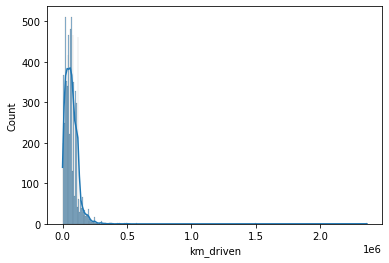

In [604]:
sns.histplot(df['km_driven'], kde=True, legend=True)
plt.show()

<span style="color:darkblue">Видим сильный разброс значений в km_driven.  **Чем меньше параметр, тем стоимость авто выше:** </span>

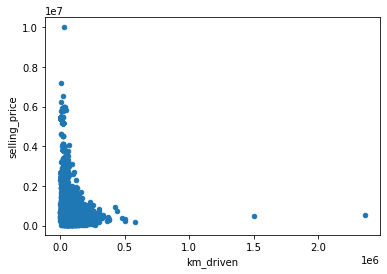

In [605]:
df.sort_values(by=['km_driven'],ascending=True).plot.scatter('km_driven','selling_price');

**<span style="color:darkblue">2.2 Трансмиссия </span>**

In [606]:
df[['transmission', 'mileage']].describe().transpose()

,count,unique,top,freq
transmission,6796,2,Manual,5900
mileage,6796,386,18.9 kmpl,197


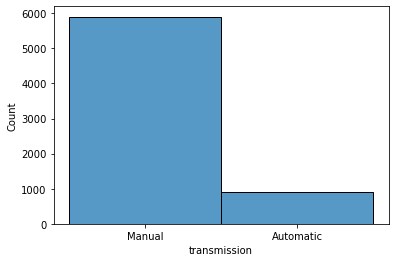

In [607]:
sns.histplot(df['transmission'])
plt.show()

In [608]:
df['transmission'].value_counts()

Manual       5900
Automatic     896
Name: transmission, dtype: int64

<span style="color:darkblue">Машин с механической коробкой больше в 6,5 раз (+658%) на  вторичном рынке, но их стоимость меньше. </span>

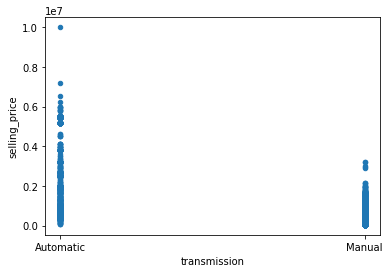

In [609]:
df.sort_values(by=['transmission'],ascending=True).plot.scatter('transmission','selling_price');

**<span style="color:darkblue">2.3 Пробег </span>**

In [610]:
df[['mileage']].sample(5)

,mileage
536,24.0 kmpl
3583,22.7 kmpl
1467,14.1 kmpl
4588,14.0 kmpl
485,24.3 kmpl


Преобразуем mileage:

In [611]:

def return_mileage(mileage):
    return mileage.split(' ')[0]
df['mileage'] = df.mileage.apply(return_mileage)
df.sample(5)
#sns.histplot(df['split_mileage'])
#plt.show()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4846,Mahindra Bolero DI AC BSIII,2005,250000,80000,Diesel,Individual,Manual,First Owner,13.6,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.0
4654,Volkswagen Vento Diesel Comfortline,2012,400000,100000,Diesel,Individual,Manual,Second Owner,20.54,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0
4191,Maruti Baleno Delta 1.3,2017,600000,20000,Diesel,Individual,Manual,First Owner,27.39,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
2607,Mahindra Bolero 2011-2019 SLE BSIII,2014,500000,48300,Diesel,Individual,Manual,Second Owner,15.96,2523 CC,62.1 bhp,195Nm@ 1400-2200rpm,7.0
4733,Honda Mobilio V i DTEC,2014,490000,120000,Diesel,Individual,Manual,First Owner,24.2,1498 CC,98.6 bhp,200Nm@ 1750rpm,7.0


In [612]:
df['mileage'] = df['mileage'].astype(float)

In [613]:
df['fuel'].value_counts()

Diesel    3696
Petrol    3022
CNG         47
LPG         31
Name: fuel, dtype: int64

Вид топлива влияет на единицы расчета пробега, поэтому  78 (= 1,15%) машин с более "зеленым" топливом не учитывались в дальнейшем анализе.

In [614]:
df = df.drop(df[df.fuel == 'CNG'].index)

In [615]:
df = df.drop(df[df.fuel == 'LPG'].index)

In [616]:
df.describe() #изменения незначительные

,year,selling_price,km_driven,mileage,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.000000,6718.000000
mean,2014.016820,6.561514e+05,6.888629e+04,19.395451,5.423638
std,3.860164,8.203636e+05,5.814421e+04,4.007793,0.969255
min,1994.000000,2.999900e+04,1.000000e+03,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.300000e+04,16.780000,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,19.300000,5.000000
75%,2017.000000,7.000000e+05,9.500000e+04,22.320000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


In [617]:
df[['mileage']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mileage,6718.0,19.395451,4.007793,0.0,16.78,19.3,22.32,42.0


**<span style="color:darkblue">75% пробега до 22,3 км! 90% в пределах 25 kmpl [км/л] </span>** 

In [618]:
df['mileage'].quantile(0.9)

24.699999999999996

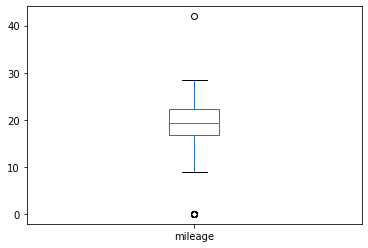

In [619]:
df['mileage'].plot.box();

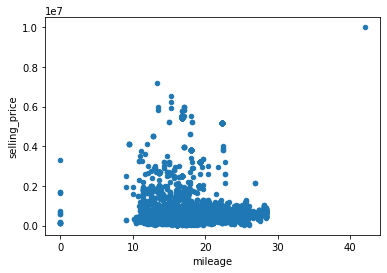

In [620]:
df.sort_values(by=['mileage'],ascending=True).plot.scatter('mileage','selling_price');

Естьзависимость между стоимостью и пробегом.

**<span style="color:darkblue">2.4 Модель </span>**

In [621]:
df['name'].describe().transpose()

count                       6718
unique                      1819
top       Maruti Swift Dzire VDI
freq                         116
Name: name, dtype: object

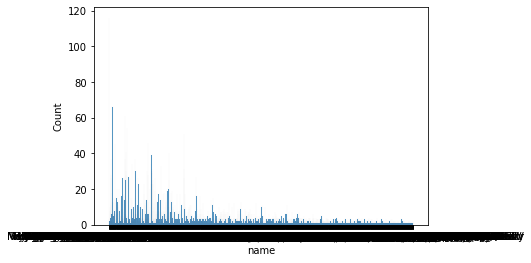

In [622]:
sns.histplot(df['name'])
plt.show()

Анализ моделей с характеристиками не имеет смысла, поэтому  рассмотрим машины только по модели.

In [623]:

def return_model(name):
    return name.split(' ')[0]
df['name'] = df.name.apply(return_model)
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6125,Maruti,2008,129000,60000,Petrol,Individual,Manual,First Owner,19.70,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
6544,BMW,2018,5830000,30000,Diesel,Individual,Automatic,First Owner,17.09,2993 CC,261.4 bhp,620Nm@ 2000-2500rpm,4.0
131,Maruti,2015,535000,40000,Diesel,Dealer,Manual,First Owner,26.21,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
1345,Nissan,2019,950000,11533,Petrol,Trustmark Dealer,Manual,First Owner,14.23,1498 CC,104.55 bhp,142Nm@ 4000rpm,5.0
38,Honda,2018,925000,28900,Petrol,Dealer,Manual,First Owner,17.80,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0


In [624]:
df.sort_values(by=['name'], ascending=True).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2909,Ambassador,2000,75000,90000,Diesel,Individual,Manual,Second Owner,12.80,1489 CC,35.5 bhp,72.9Nm@ 2250rpm,5.0
4024,Ambassador,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.80,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
6805,Ambassador,2008,200000,80000,Diesel,Individual,Manual,Third Owner,13.50,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
4230,Audi,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
1337,Audi,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


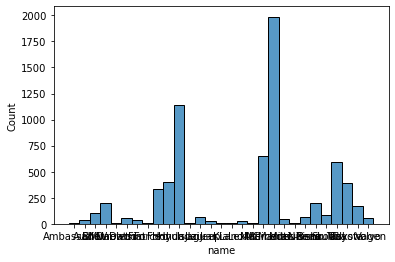

In [625]:
sns.histplot(df['name'].sort_values(ascending=True))
plt.show()

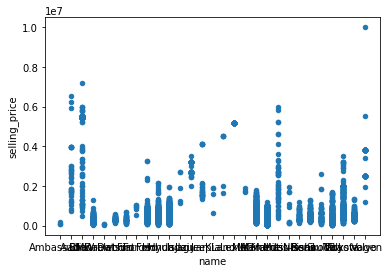

In [626]:
df.sort_values(by=['name'],ascending=True).plot.scatter('name','selling_price');

**<span style="color:darkblue">Есть зависимость между ценой  и  маркой  автомобиля.</span>** 

In [627]:
# Признак не используется в МО, так как очень большой набор значений. 
# Возможно разделение данных на кластеры и делать дальнейший прогноз по кластерам.

**<span style="color:darkblue">2.5 Год выпуска </span>**

In [628]:
df['year'].describe()

count    6718.000000
mean     2014.016820
std         3.860164
min      1994.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

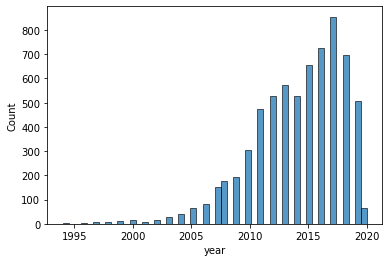

In [629]:
sns.histplot(df['year'])
plt.show()

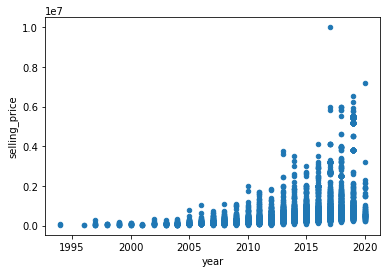

In [630]:
df.sort_values(by=['year'],ascending=True).plot.scatter('year','selling_price');

 **<span style="color:darkblue">Чем авто моложе, тем его стоимость выше.</span>** 

In [631]:
# Categorial data - excluded
# Time series behave categorically different than data that is not ordered sequentially and we have to model them differently
#treat year as categorical variable and use some of the techniques such as One Hot Ecoding or Dummy Variables for better performance

**<span style="color:darkblue">2.6 Количество владельцев </span>**

In [632]:
df['owner'].describe()

count            6718
unique              5
top       First Owner
freq             4474
Name: owner, dtype: object

In [633]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [634]:
df['owner'].value_counts()

First Owner             4474
Second Owner            1685
Third Owner              427
Fourth & Above Owner     128
Test Drive Car             4
Name: owner, dtype: int64

test drive car уберем из сета:

In [635]:
df = df.drop(df[df.owner == 'Test Drive Car'].index)

In [636]:
df['owner'].value_counts() # проверка

First Owner             4474
Second Owner            1685
Third Owner              427
Fourth & Above Owner     128
Name: owner, dtype: int64

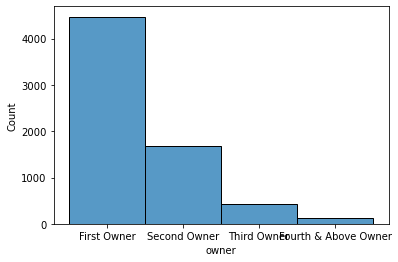

In [637]:
sns.histplot(df['owner'])
plt.show()

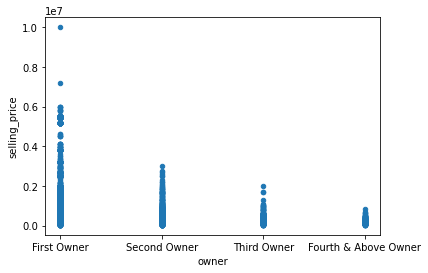

In [638]:
df.plot.scatter('owner','selling_price');

 **<span style="color:darkblue">Обратная зависимость - цена растет с уменьшением количества владельцев.</span>** 

-------

## <span style="color:darkblue">3. Машинное обучение </span>

<span style="color:darkblue">Выбранные признаки отсортированы далее для выполнения предсказание цен на подержанные автомобили, путем множественной линейной регрессии:</span> 

In [639]:
X = df.drop(['year','owner','name','selling_price', 'fuel', 'seller_type', 'engine', 'max_power','torque', 'seats'], axis=1)

y = df['selling_price'] # целевая переменная (target)

In [640]:
X.head()

,km_driven,transmission,mileage
0,145500,Manual,23.40
1,120000,Manual,21.14
2,127000,Manual,23.00
3,120000,Manual,16.10
4,45000,Manual,20.14


Преобразуем данные в числовые:

In [641]:
X['transmission'] = X['transmission'].map({'Automatic' : 1, 'Manual' : 0})

In [642]:
X.head()

,km_driven,transmission,mileage
0,145500,0,23.40
1,120000,0,21.14
2,127000,0,23.00
3,120000,0,16.10
4,45000,0,20.14


In [643]:
df.to_csv('carsnew.csv')

In [644]:
X.dtypes

km_driven         int64
transmission      int64
mileage         float64
dtype: object

In [645]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6998
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   km_driven     6714 non-null   int64  
 1   transmission  6714 non-null   int64  
 2   mileage       6714 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 209.8 KB


In [648]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
np.array(X_train).reshape((-1, 1)), np.array(X_test).shape

(array([[1.200e+05],
        [0.000e+00],
        [2.077e+01],
        ...,
        [4.970e+04],
        [0.000e+00],
        [1.510e+01]]),
 (1679, 3))

In [649]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [650]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3542741442633067


 **<span style="color:darkblue">35% of the variability in the outcome variable (y) can be explained by the predictor variables (x)</span>** 

In [651]:
print(f"intercept: {model.intercept_}") #b0

intercept: 851260.7671476728


In [652]:
print(f"coefficients: {model.coef_}")  # b1

coefficients: [-2.39389646e+00  1.29608674e+06 -1.05524588e+04]


In [653]:
pred = model.predict(X_test)

In [654]:
print(f"predicted response:\n{pred[:11]}") #first 10

predicted response:
[ 598424.00064531  491331.80758977  411434.57725572  434270.00989862
 1907969.52479805 1835206.0655793   461031.13376694  413484.8953573
  601342.43780286  411118.00349076  372993.68739072]


In [657]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)


 **<span style="color:darkblue"> Результат: \
 Точность модели  низкая -  35%. \
 Параметры: km_driven, mileage, transmission не имеют сильного влияния на цену подержаного авто. \
\
 Рекомендации: \
 Не использовать вышеперечисленные параметры для прогнозирования цен данного датасета. </span>**  

------

In [662]:
!pip install streamlit

     |████████████████████████████████| 8.9 MB 2.4 MB/s eta 0:00:01     |███▊                            | 1.0 MB 1.2 MB/s eta 0:00:07
     |████████████████████████████████| 173 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 471 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.7 MB 1.3 MB/s eta 0:00:01     |██████████████████████          | 17.0 MB 3.5 MB/s eta 0:00:03
     |████████████████████████████████| 164 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 3.2 MB/s eta 0:00:01
  Created wheel for validators: filename=validator

In [1]:
!streamlit hello


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email: ^C
2023-07-02 01:27:22.979 


In [661]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'